In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("C:/Users/DELL/Desktop/data_science_projects/Zomato-data-.csv")

In [4]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


### We now split the rate columns into float values

In [6]:
def split_rate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
df['rate']=df['rate'].apply(split_rate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


### Check for gaps and null values

In [7]:
print(df.isnull().values.any())

False


### Print the type of hotels 

In [8]:
import seaborn as sns

C:\Users\DELL\AppData\Local\Temp\ipykernel_21448\4053632235.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['listed_in(type)'],palette='viridis')


Text(0.5, 0, 'Type of resturants')

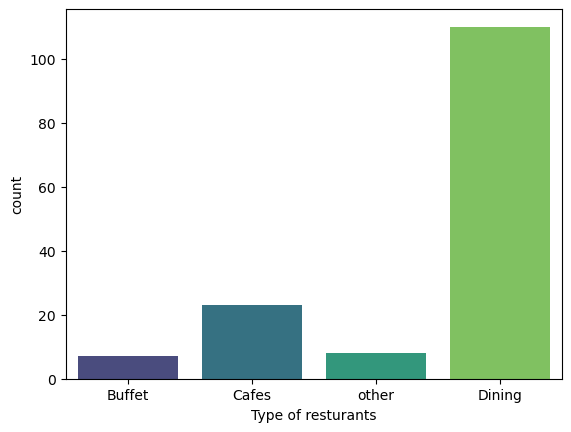

In [9]:
sns.countplot(x=df['listed_in(type)'],palette='viridis')
plt.xlabel('Type of resturants')

### We count the vote for each of the resturant type

Text(0, 0.5, 'Votes count')

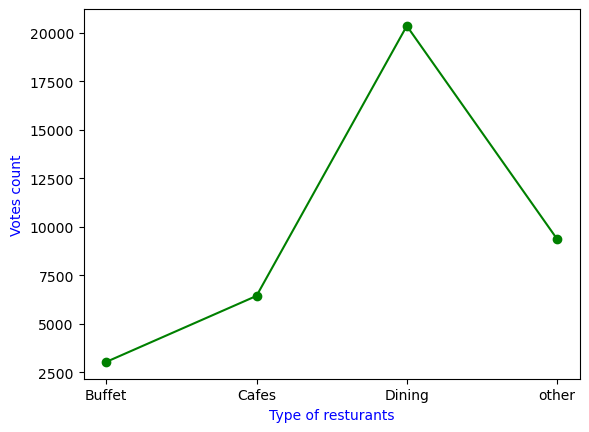

In [10]:
grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='green',marker='o')
plt.xlabel('Type of resturants',c='blue',size=10)
plt.ylabel('Votes count',c='blue',size=10)

### We now find the resturtant with maximum votes 

In [11]:
max_votes=df['votes'].max()
resturant_max_votes=df.loc[df['votes']==max_votes,'name']

print("Resturant with maximum votes:")
print(resturant_max_votes)

Resturant with maximum votes:
38    Empire Restaurant
Name: name, dtype: object


C:\Users\DELL\AppData\Local\Temp\ipykernel_21448\115649415.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['online_order'],palette='viridis')


<Axes: xlabel='online_order', ylabel='count'>

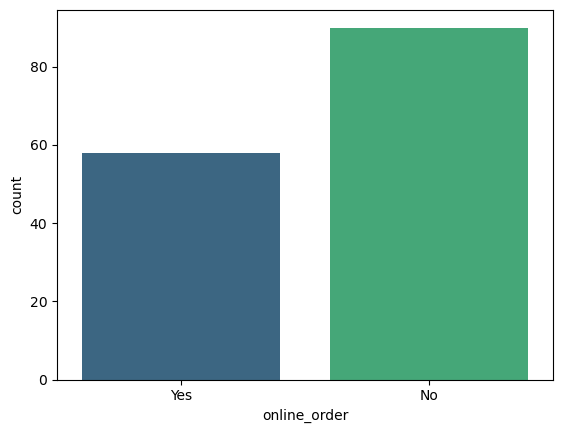

In [12]:
sns.countplot(x=df['online_order'],palette='viridis')

### We check the distubution of ratings

Text(0.5, 1.0, 'Ratings')

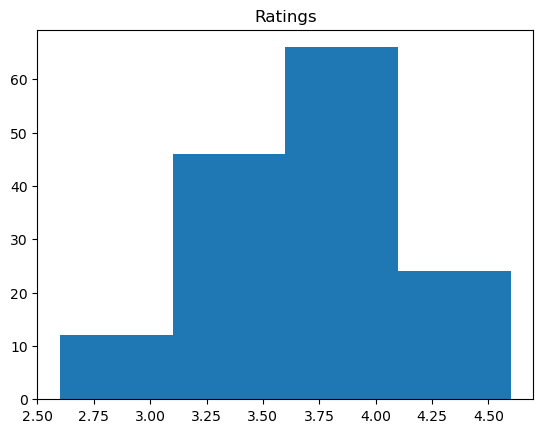

In [13]:
plt.hist(df['rate'],bins=4)
plt.title("Ratings")

### Analyze data for couples to get the price range

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

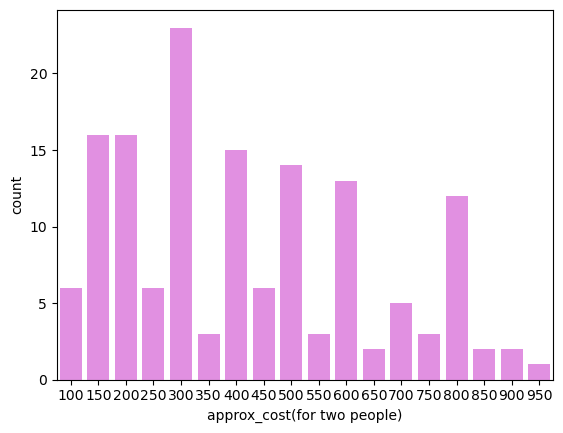

In [25]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data,color='violet')

## Compare online and offline order

<Axes: xlabel='online_order', ylabel='rate'>

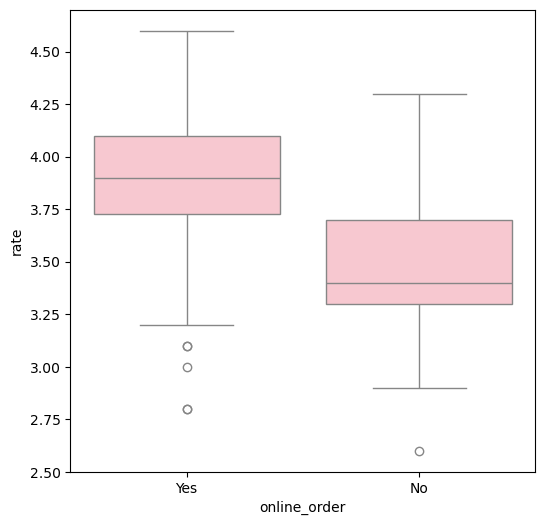

In [23]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df,color='pink')

## Order mode according to the resturants

Text(50.722222222222214, 0.5, 'Listed Type')

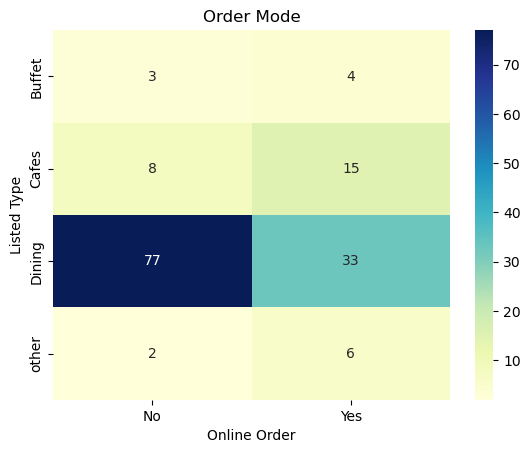

In [29]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Order Mode")
plt.xlabel('Online Order')
plt.ylabel('Listed Type')